In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

## DBSCAN

Let's see what this is all about...
(and make use of [this](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py))

Now I'll follow the demo more or less verbatim, then I'll try and have some fun with it.

In [2]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Generate sample data

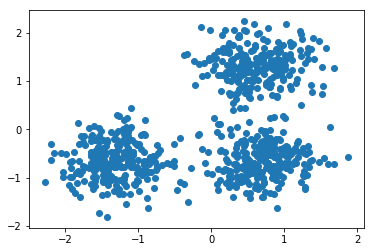

In [33]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1])

Compute DBSCAN

In [4]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


Plot results

/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


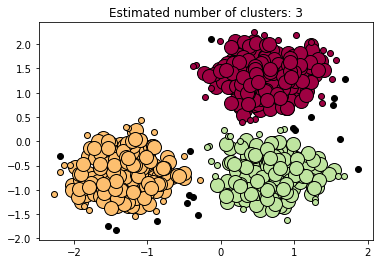

In [5]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

## The iris dataset

Can we try a similar thing on the iris dataset?

In [7]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()

In [13]:
iris.keys()

dict_keys(['target_names', 'DESCR', 'feature_names', 'data', 'target'])

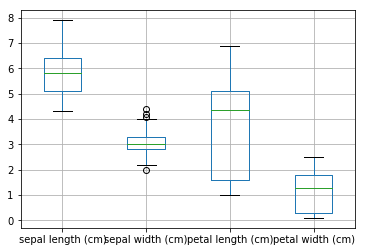

In [58]:
pd.DataFrame(iris.data, columns=iris.feature_names).boxplot()

In [76]:
X = iris.data
db = DBSCAN(eps=0.4, min_samples=10, n_jobs=-1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = iris.target

In [77]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.567
Completeness: 0.576
V-measure: 0.571
Adjusted Rand Index: 0.457
Adjusted Mutual Information: 0.558
Silhouette Coefficient: 0.121


In [78]:
labels = iris.target
labels.shape

(150,)

In [147]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


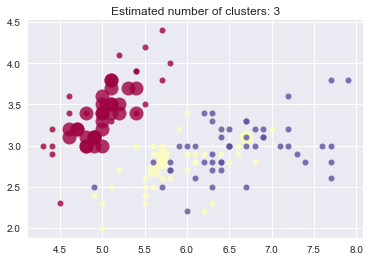

In [151]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14, alpha= 0.8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6, alpha= 0.8)

plt.title('Estimated number of clusters: %d' % n_clusters_)


0 1


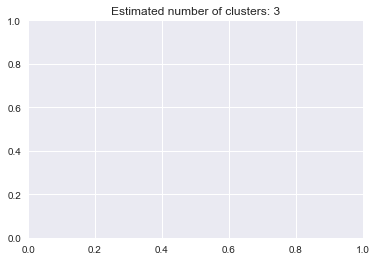

In [152]:
import scipy
n_cols = X.shape[1]
n_plots = scipy.special.binom(n_cols, 2)
n = 1
for i in range(1): #n_cols):
    for j in range(i+1, i+2): # ,n_cols):
        print(i,j)
#         plt.subplot(1, n_plots, i)

        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = 'k'

                class_member_mask = (labels == k)
    
                xy = X[class_member_mask & core_samples_mask]
                plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                         markeredgecolor='k', markersize=14)

                xy = X[class_member_mask & ~core_samples_mask]
                plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                         markeredgecolor='k', markersize=6)
    
        n += 1
    
plt.title('Estimated number of clusters: %d' % n_clusters_)

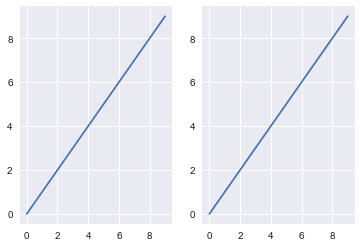

In [125]:
plt.subplot(1,2,1)
plt.plot(range(10),range(10))
plt.subplot(1,2,2)
plt.plot(range(10),range(10))